In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


1. **Dataset Overview:**
*   The dataset contains 440 entries and 8 columns.
*   Columns represent features related to wholesale customer spending on different products.
*   No missing values are present, and all columns are integers.







2. **Columns Description:**

*   Channel: Customer channel (1: Horeca, 2: Retail).
*   Region: Geographic region (1: Lisbon, 2: Oporto, 3: Other regions).

*   Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen: Annual spending (monetary units) on various product categories.




3. Summary Statistics:

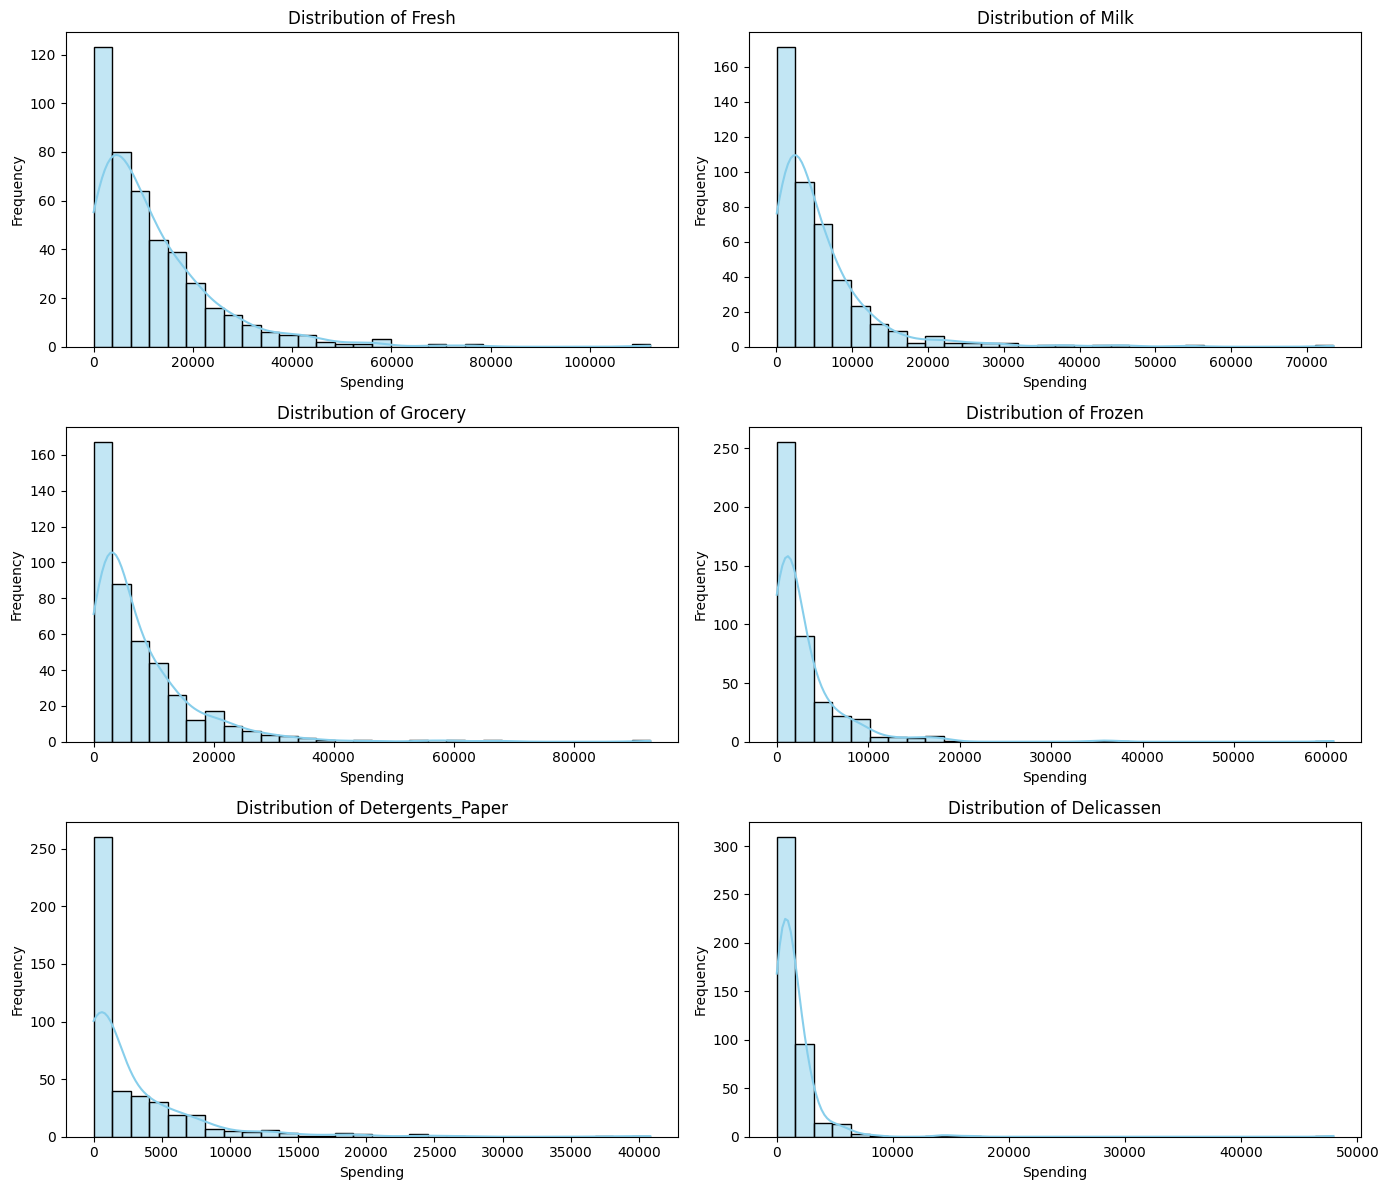

In [6]:
# Plot distributions of spending categories
columns_to_plot = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for ax, col in zip(axes.flatten(), columns_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color='skyblue')
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel("Spending")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


**Observations from Distribution Plots:**


1.   Skewness:

*  All spending categories exhibit right-skewed distributions, with a few customers spending significantly more than the average.
*   This confirms the presence of outliers.



2.   Wide Ranges:

*   Categories like Fresh, Milk, and Grocery have broad ranges of spending, suggesting the need for scaling to ensure fair treatment during clustering.





In [ ]:
# Correlation matrix
corr_matrix = df[columns_to_plot].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Spending Categories")
plt.show()


Correlation Analysis:

1.   High Correlation:

*   Grocery and Detergents_Paper (0.92): Customers who spend more on groceries tend to spend similarly on detergents.

*   Milk also shows strong correlations with Grocery (0.73) and Detergents_Paper (0.66).


2.   Low Correlation:

*   Fresh, Frozen, and Delicassen have weak correlations with other categories, indicating unique spending patterns.





**Data Preprocessing (Scaling):**

In [7]:
from sklearn.preprocessing import StandardScaler

# Scale the data (exclude 'Channel' and 'Region')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_to_plot])

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_plot)
scaled_df.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


**K-Means Clustering and Elbow Method:**

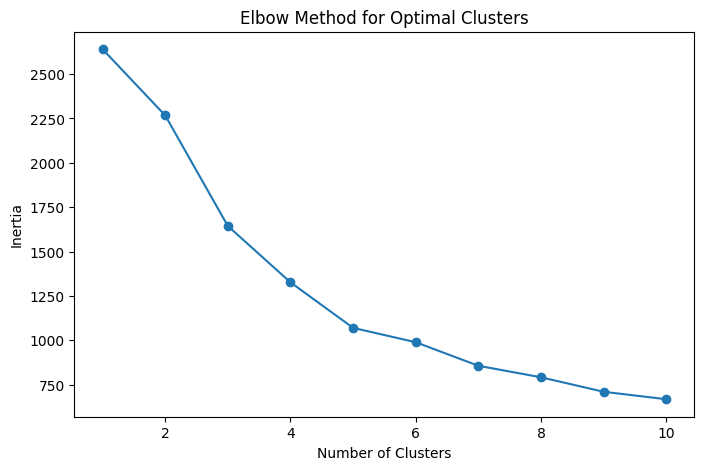

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method to find optimal clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


**DBSCAN Clustering:**

In [9]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Count unique clusters
import numpy as np
print(f"DBSCAN clusters: {np.unique(dbscan_labels)}")


DBSCAN clusters: [-1  0]


**PCA for Dimensionality Reduction:**

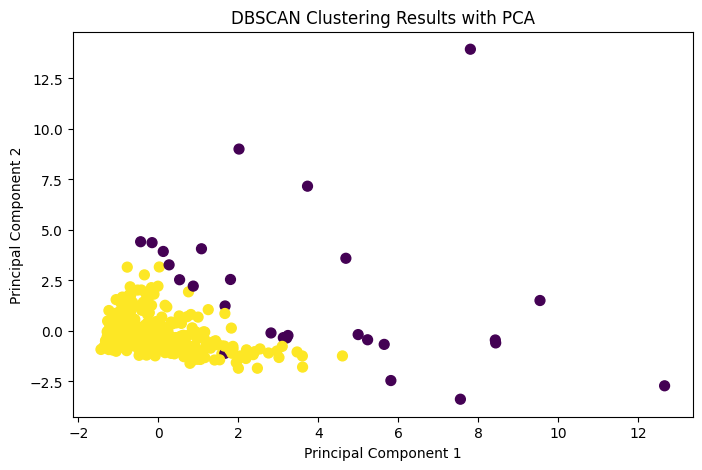

In [10]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**`Conclusion`**

1.   Summary of Data Insights


*   The dataset contained information on annual spending across six product categories.

*   Distributions showed right-skewed data with potential outliers, indicating varying customer spending behaviors.



2.   Clustering Results:


*   K-Means Clustering: The Elbow Method suggested the optimal number of clusters (e.g., 3 or 4), indicating distinct customer segments.

*   Agglomerative Clustering (if performed) showed similar or contrasting results to K-Means.
*   DBSCAN identified outliers and core clusters, highlighting unique customer behavior patterns.




3.   Dimensionality Reduction (PCA):


*   PCA effectively reduced the dataset to two dimensions while preserving variance.
*   Visualization of clusters after PCA revealed clear distinctions in customer groups, confirming clustering accuracy.


4.   Challenges and Solutions:

*   High correlations among variables (e.g., Grocery and Detergents_Paper) were managed through dimensionality reduction.
Skewness and outliers were handled using scaling.

*   Skewness and outliers were handled using scaling.
